In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import tensorflow as tf

from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [60]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

### Function declarations

In [61]:
def plot_time_series(x, y, xlabel="Time", ylabel="Value", figsize=(10, 4), 
                     use_date_locator=True, title=None):
  fig, ax = plt.subplots(figsize=figsize)

  ax.plot(x, y)

  if use_date_locator:
    formatter = mdates.DateFormatter("%d/%m/%Y")
    # locator = mdates.YearLocator(base=2)
    locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
  

  ax.grid("on")
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)

  if title is not None:
    ax.set_title(title)

  if use_date_locator:
    for j, label in enumerate(ax.get_xticklabels()):
      label.set_rotation(40)
      label.set_horizontalalignment('right')

  plt.show(fig)

In [62]:
file_path = "./CDB THN 2021-2024.csv"
df_cdb = pd.read_csv(file_path)
df_cdb["Tgl. Mohon"] = pd.to_datetime(df_cdb["Tgl. Mohon"], format="%d/%m/%Y")
df_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,18/08/1996,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,14/04/2003,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,13/02/1997,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,16/11/1982,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,17/01/1976,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA
...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,06/11/2004,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,03/21/1978,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,01/19/1961,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,04/30/1980,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0


In [63]:
df_cdb_with_initial = df_cdb.copy()
df_cdb_with_initial["initial Varian Plus"] = df_cdb_with_initial["Varian Plus"].apply(lambda x: x[0])
df_cdb_with_initial

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,18/08/1996,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,14/04/2003,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,13/02/1997,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,16/11/1982,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,17/01/1976,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,06/11/2004,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,03/21/1978,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,01/19/1961,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,04/30/1980,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M


In [74]:
df_cdb_with_tipe = df_cdb_with_initial.copy()

def label_as_institution(row):
    if row[['Gender', 'Tgl. Lahir', 'Pekerjaan', 'Pengeluaran', 'Pendidikan']].isnull().any():
        return 'INSTANSI LUAR'
    else:
        return 'INDIVIDU'

df_cdb_with_tipe['Tipe Pembeli'] = df_cdb_with_tipe.apply(label_as_institution, axis=1)


df_cdb_with_tipe['Tgl. Lahir'] = pd.to_datetime(df_cdb_with_tipe['Tgl. Lahir'], errors='coerce', format="%d/%m/%Y")
df_cdb_with_tipe['Umur'] = (pd.to_datetime('today') - df_cdb_with_tipe['Tgl. Lahir']).dt.days // 365

df_cdb_with_tipe

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus,Tipe Pembeli,Umur
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L,INDIVIDU,28.0
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L,INDIVIDU,21.0
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L,INDIVIDU,27.0
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L,INDIVIDU,42.0
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L,INDIVIDU,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M,INDIVIDU,20.0
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,NaT,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M,INDIVIDU,NaN
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,NaT,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L,INDIVIDU,NaN
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,NaT,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M,INDIVIDU,NaN


In [79]:
df_cdb_korelasi = df_cdb_with_tipe.copy()

numerical_cols = df_cdb_korelasi.select_dtypes(include=['float64', 'int64']).columns
target = 'initial Varian Plus'

# Korelasi variabel
numerical_corr = {}
for col in numerical_cols:
    if col != target:
        valid_data = df_cdb_korelasi[[col, target]].dropna()
        target_codes = valid_data[target].astype('category').cat.codes
        
        # Korelasi Pearson dan Spearman
        pearson_corr, _ = pearsonr(valid_data[col], target_codes)
        spearman_corr, _ = spearmanr(valid_data[col], target_codes)
        
        numerical_corr[col] = {'Pearson': pearson_corr, 'Spearman': spearman_corr}

numerical_corr

{'Umur': {'Pearson': 0.08483222936436516, 'Spearman': 0.05975168516412021}}

In [65]:
# df_cdb_with_tipe = df_cdb_with_initial.copy()
# df_cdb_with_tipe.set_index("Tgl. Mohon", inplace=True)
# df_week = df_cdb_with_tipe.resample("W").sum()
# df_week

In [66]:
df_cdb_with_tipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tgl. Mohon           6857 non-null   datetime64[ns]
 1   Nama                 6857 non-null   object        
 2   Alamat               6857 non-null   object        
 3   Kelurahan            6857 non-null   object        
 4   Kecamatan            6857 non-null   object        
 5   Gender               6471 non-null   object        
 6   Tgl. Lahir           6857 non-null   object        
 7   Pekerjaan            6471 non-null   object        
 8   Pengeluaran          6470 non-null   object        
 9   Pendidikan           6470 non-null   object        
 10  Varian Plus          6857 non-null   object        
 11  initial Varian Plus  6857 non-null   object        
 12  Tipe Pembeli         6857 non-null   object        
dtypes: datetime64[ns](1), object(12)


In [71]:
df_cdb_with_tipe['Tgl. Mohon'] = (pd.to_datetime('today') - pd.to_datetime(df_cdb_with_tipe['Tgl. Mohon'], errors='coerce')).dt.days

label_encoder = LabelEncoder()
df_cdb_with_tipe['initial Varian Plus'] = label_encoder.fit_transform(df_cdb_with_tipe['initial Varian Plus'])
df_cdb_with_tipe['Gender'] = label_encoder.fit_transform(df_cdb_with_tipe['Gender'].fillna('Unknown'))
df_cdb_with_tipe['Pekerjaan'] = label_encoder.fit_transform(df_cdb_with_tipe['Pekerjaan'].fillna('Unknown'))
df_cdb_with_tipe['Pendidikan'] = label_encoder.fit_transform(df_cdb_with_tipe['Pendidikan'].fillna('Unknown'))
df_cdb_with_tipe['Tipe Pembeli'] = label_encoder.fit_transform(df_cdb_with_tipe['Tipe Pembeli'].fillna('Unknown'))

`Tgl. Lahir` jadi `Age` dan `Pengeluaran` diubah jadi numerik

In [72]:
df_cdb_with_tipe['Pengeluaran'] = df_cdb_with_tipe['Pengeluaran'].replace({
    'Rp. 1.750.001,- s/d Rp. 2.500.000,-': 1,
    'Rp. 2.500.001,- s/d Rp. 5.000.000,-': 2,
    'Rp. 5.000.001,- s/d Rp. 7.500.000,-': 3,
    'Rp. 7.500.001,- s/d Rp. 10.000.000,-': 4,
    'Rp. 10.000.001,- s/d Rp. 15.000.000,-': 5,
    'Rp. 15.000.001,- s/d Rp. 20.000.000,-': 6,
    'Rp. 20.000.001,- s/d Rp. 30.000.000,-': 7,
    'Rp. 30.000.001,- s/d Rp. 50.000.000,-': 8,
    'Rp. 50.000.001,- s/d Rp. 100.000.000,-': 9,
    '< Rp. 900.000,-': 0,
    '> Rp. 6.000.000,-': 10,
    'Rp. 900.001,- s/d Rp. 1.250.000,-': 1,
    'Rp. 4.000.001,- s/d Rp. 6.000.000,-': 7,
    'Rp. 2.500.001,- s/d Rp. 4.000.000,-': 6,
    'Rp. 1.250.001,- s/d Rp. 1.750.000,-': 2
})

df_cdb_with_tipe['Pengeluaran'] = pd.to_numeric(df_cdb_with_tipe['Pengeluaran'], errors='coerce')

C:\Users\TEMP\AppData\Local\Temp\ipykernel_3624\3547878909.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cdb_with_tipe['Pengeluaran'] = df_cdb_with_tipe['Pengeluaran'].replace({


korelasi _Pearson_ dan _Spearman_

In [73]:
df_numeric = df_cdb_with_tipe[['Tgl. Mohon', 'Gender', 'Pekerjaan', 'Pendidikan', 'Pengeluaran', 'Age', 'Tipe Pembeli', 'initial Varian Plus']]

# korelasi Pearson
pearson_corr = df_numeric.corr(method='pearson')

# korelasi Spearman
spearman_corr = df_numeric.corr(method='spearman')

print("Korelasi Pearson:")
print(pearson_corr)
print("\nKorelasi Spearman:")
print(spearman_corr)

KeyError: "['Age'] not in index"

In [ ]:
df_cdb_with_tipe

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus,Tipe Pembeli,Age
0,1445,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,0,1996-08-18,19,1.0,5,LD0,4,0,28.0
1,1445,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,1,2003-04-14,10,0.0,0,LP0,4,0,21.0
2,1445,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,1,1997-02-13,14,1.0,2,LPA,4,0,27.0
3,1445,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,1,1982-11-16,9,7.0,4,LP0,4,0,42.0
4,1445,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,0,1976-01-17,10,6.0,4,LPA,4,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,108,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,0,NaT,10,1.0,4,MM0,5,0,NaN
6853,108,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,1,NaT,10,1.0,4,MM0,5,0,NaN
6854,108,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,0,NaT,10,1.0,2,LP3,4,0,NaN
6855,108,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,1,NaT,2,2.0,4,ML0,5,0,NaN


In [ ]:
df_L = df_cdb_with_tipe[df_cdb_with_tipe["initial Varian Plus"] == "L"].copy()
df_L.reset_index(inplace=True, drop=True)
df_L

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus,Tipe Pembeli,Age


Make a group over a week

In [ ]:
df_temp = df_L.groupby([pd.Grouper(key="Tgl. Mohon", freq="W-MON")])\
  .sum()
df_L_week = pd.DataFrame()
df_L_week["Tgl. Mohon"] = df_temp.index
df_L_week["Qty."] = df_temp["initial Varian Plus"].apply(lambda x: len(x)).reset_index(drop=True)
df_L_week

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

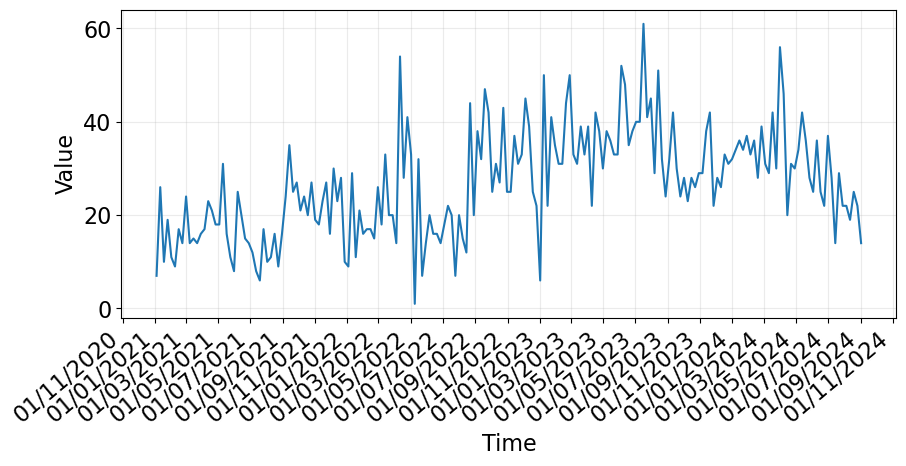

In [ ]:
plot_time_series(df_L_week["Tgl. Mohon"], df_L_week["Qty."])

In [ ]:
adfuller(df_L_week["Qty."])

(-2.6110612347152875,
 0.09073261741027933,
 4,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 1285.8948039429606)

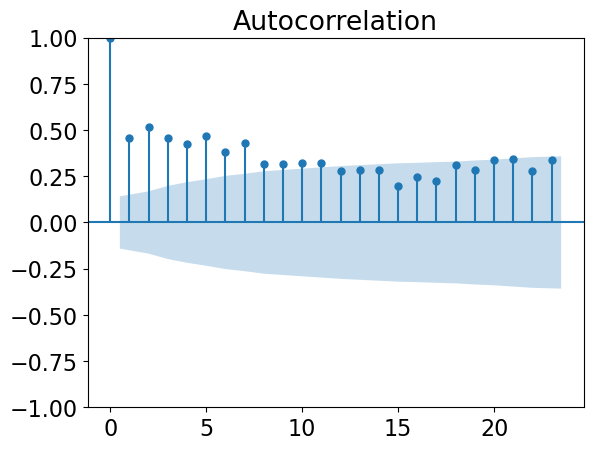

In [ ]:
plot_acf(df_L_week["Qty."]);

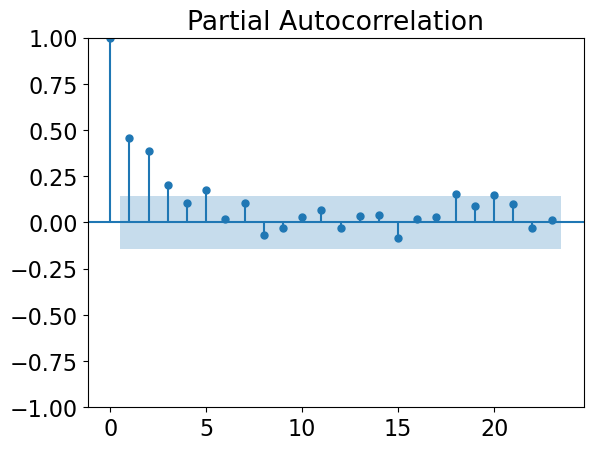

In [ ]:
plot_pacf(df_L_week["Qty."]);